# Spatial Inequalities in Educational Infrastructure: Bayesian

Hierarchical Modelling of School Availability Across North Borneo

Alvin Bong

Understanding the spatial distribution of educational infrastructure is essential for ensuring equitable access to schooling. This study examines regional disparities in school availability across Brunei and the neighboring Malaysian states of Sarawak and Sabah, with a focus on identifying potential underserved areas. First, exploratory data analysis (EDA) was conducted to compare school counts and student-teacher ratios at the district level across the three regions. The core analysis employs Standardized Incidence Ratio (SIR) and Bayesian spatial Poisson model using Integrated Nested Laplace Approximation (INLA) to estimate the relative abundance of schools across Brunei’s districts, adjusting for expected counts based on population, region size and socioeconomic indicator (house price + partially simulated). Spatially structured and unstructured random effects were incorporated to account for latent spatial processes. Posterior estimates identified districts with significantly lower school availability than the national baseline, supporting future policy planning and school placement.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: sf
Linking to GEOS 3.13.0, GDAL 3.10.3, PROJ 9.6.2; sf_use_s2() is TRUE

Loading required package: terra
terra 1.8.60

Attaching package: 'terra'

The following object is masked from 'package:tidyr':

    extract

Loading required package: viridisLite

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

This is INLA_25.06.07 built 2025-06-11 18:54:45 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - List available models/likelihoods/etc with inla.list.models()
 - Use inla.doc(<NAME>) to access documentation


Attaching package: 'patchwork'

The following object is masked from 'package:terra':

    area

Rows: 2993 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): state, district, stage, type
dbl  (1): schools
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

character(0)

character(0)

[1] "Matu"     "Pakan"    "Selangau"

character(0)

Rows: 319200 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): state, district, sex, age, ethnicity
dbl  (1): population
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

character(0)

character(0)

character(0)

character(0)

## Introduction

Education is a foundational pillar of national development and its people, influencing social well-being, economic growth, and long-term sustainability. The global significance of education is recognized in Sustainable Development Goal 4, which promotes inclusive and equitable quality education for all \[1\]. Nationally, Brunei Darussalam’s national vision, Wawasan Brunei 2035, positions education as a cornerstone of the country’s long-term development goals. Ensuring equitable access to education through sufficient infrastructure, fair resource distribution, and balanced student–teacher ratios is critical to delivering quality learning experiences.

While several studies have examined general aspects of education in Brunei, there have been limited studies based on quantitative spatial methods, with only one examining the spatial distribution and hotspots of schools. This project aims to addresses that gap by first conducting a comparative analysis of school availability and student–teacher ratios across Brunei’s districts, with additional context from neighboring Malaysian states, Sarawak and Sabah.

Next, Standardized Incidence Ratios (SIR) and Bayesian hierarchical models are used to identify adminstrative regions in Brunei where school availability falls significantly below the national baseline, supporting future policy planning and school placements.

## Data

This study focuses exclusively on government primary and secondary schools, as these institutions serve as the main access points to education for most youth. The school dataset from 2018 was used as it is the most recent year for which disaggregated school-level data is available in Brunei. Although more recent statistics exist, they are published only in summary form.

Population data is drawn from the 2021 national census, the most recent census available in Brunei, despite the mismatch in years with the school dataset. Brunei conducts its national census every ten years, making the 2021 data the best option for population estimates.

The following key data variables were used: school counts, administrative boundary data, population, student–teacher ratios, and house prices. These datasets were cleaned, wrangled, and merged primarily using left_join() and rbind(), with further details provided below.

### Brunei

Data on school locations, student–teacher ratios, administrative boundaries, and population were sourced from the `bruneimap` R package. The school dataset `sch_sf` includes georeferenced point data for each institution. For our areal analysis, schools were aggregated by district and mukim (finer administrative level). Despite composing of only four districts, district-level aggregation was used for broader comparisons (student–teacher ratios and school counts) to match the size of available administrative resolution in Malaysian data. Mukims ($N = 39$), which provide finer geographic resolution, were instead used for the Bayesian spatial analysis of school availability in Brunei.

To incorporate a socioeconomic indicator, we used median house prices derived from approximately 30,000 property listings spanning 1993–2025. These were calculated at the mukim level and included as a covariate in the Bayesian model. In cases where house price data were missing, values were imputed using predictions from an INLA-based Gaussian model. Manual imputations based on local knowledge were initially tested, but the INLA-predicted values were ultimately adopted, as both methods produced similar model outcomes. Given the nature of the data, house prices were treated as partially simulated estimates and may not fully reflect actual market values.

### Malaysia

Malaysian data variables were sourced from the national open data portal \[data.gov.my\], and include district-level school counts and population estimates for the states of Sarawak and Sabah. Administrative boundary (districts) were obtained via the `geomdata` R package, as OpenStreetMap (`osmdata`) does not provide required administrative divisions level.

Some inconsistencies were found between school data and adminstrative boundaries, particularly in areas where older districts had been subdivided into newer ones. In these cases, school counts were available only for the original (larger) districts. To ensure consistency, we excluded the newer subdivisions and manually reassigned schools in the affected areas to the nearest valid district.

## Method

Exploratory data anlysis using Clorepath maps for schools count, by area (usingst_area) studnet teacher ratio

Neighbour type

POisson INLA hierarchical model

covariates: house price as socio economic index

Spatial Poisson model Justify offset (population) Explain fixed and random effects Introduce INLA + BYM

## Results

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data
Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

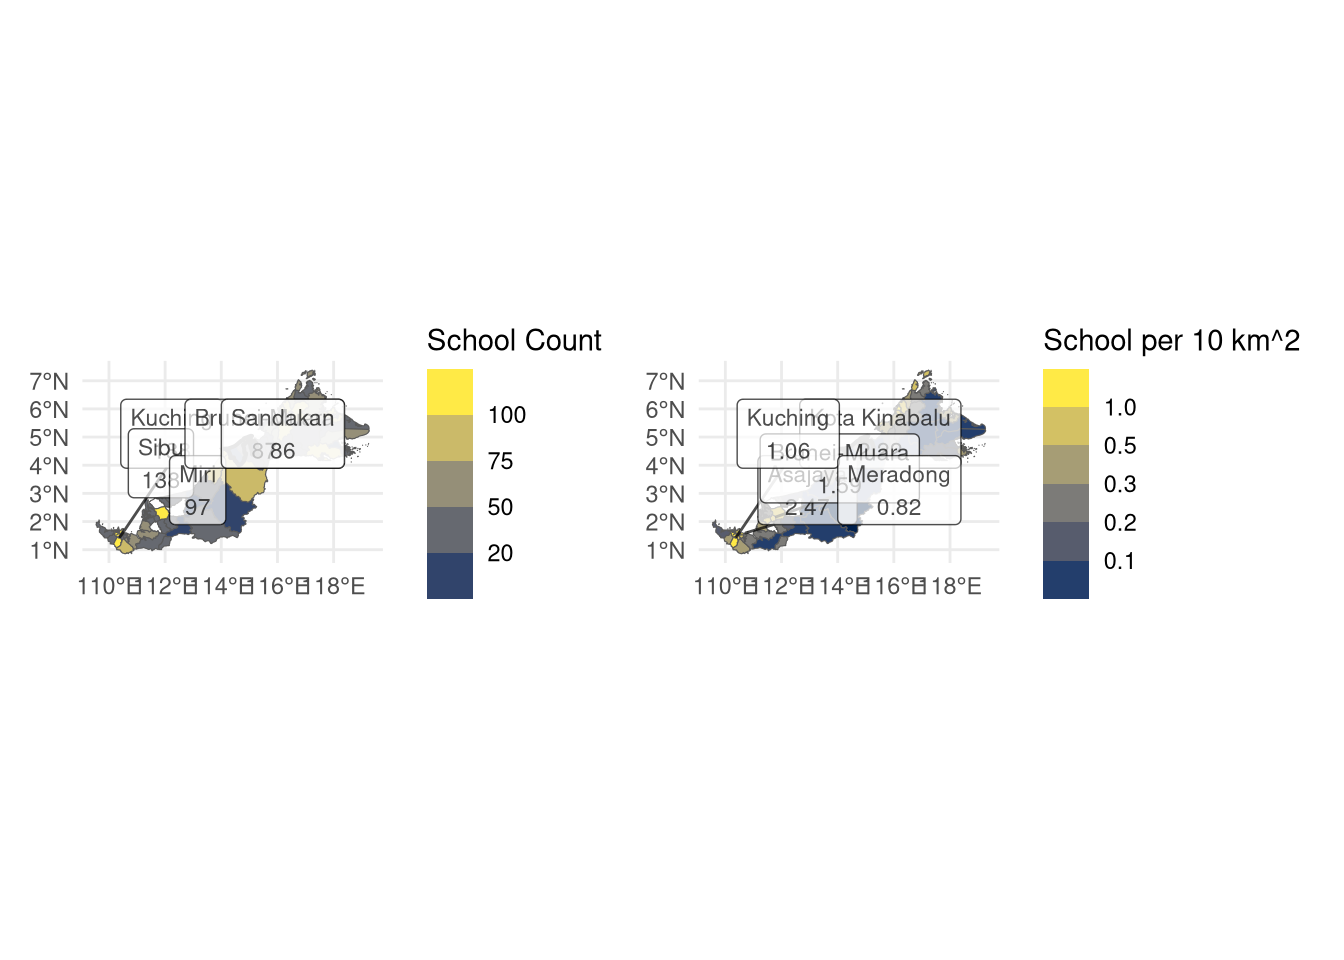

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data
Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

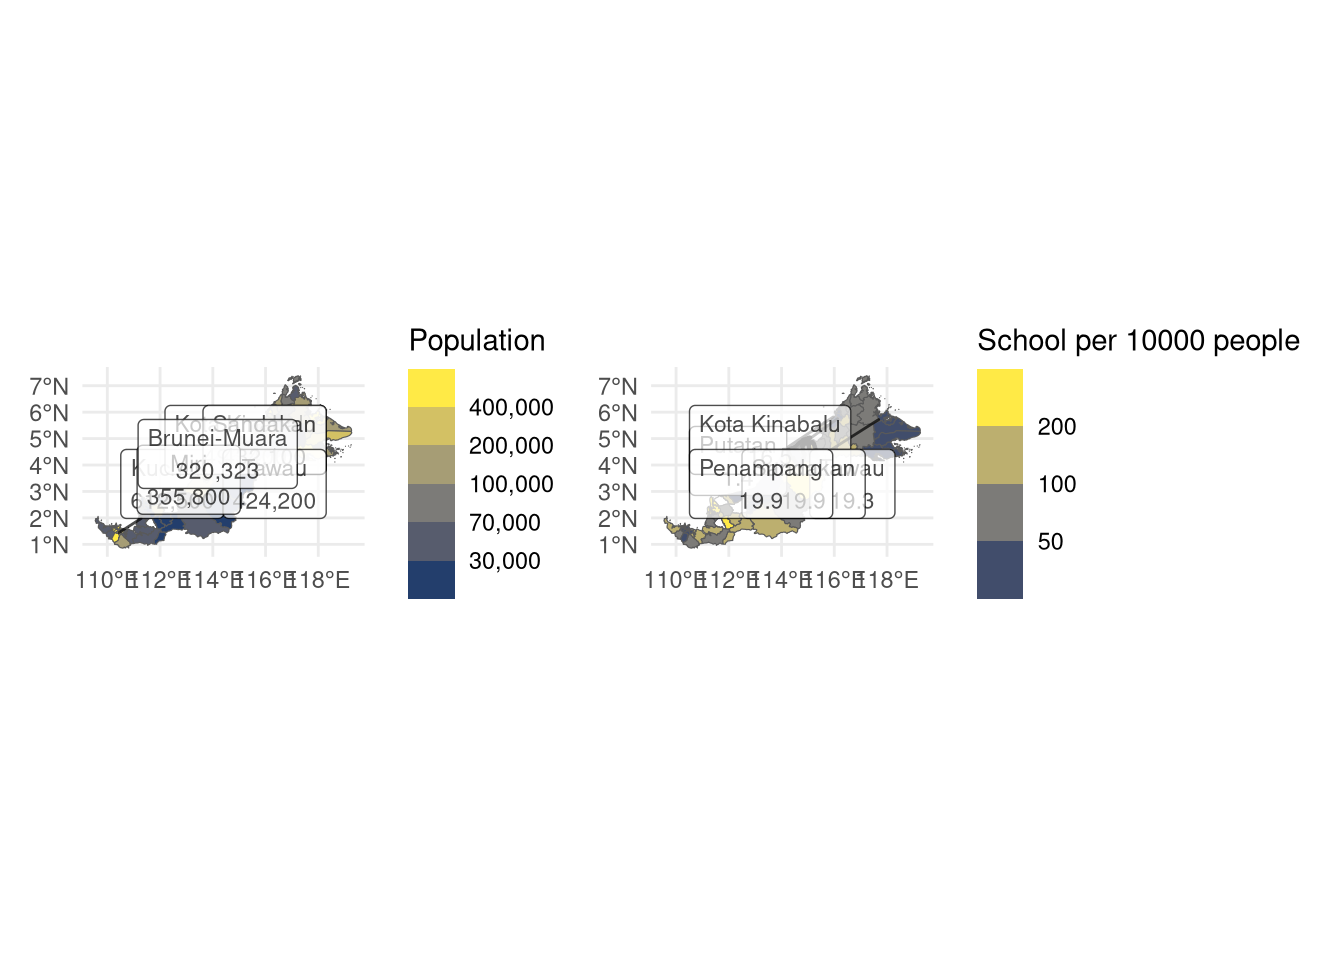

In [ ]:
nborneo_sch_sf <- nborneo_sch_sf %>% mutate(area = as.numeric(st_area(geometry)))
nborneo_sch_sf <- nborneo_sch_sf %>% mutate(sch_pop = schools/population*100000, # per 10000 people
                                            sch_area = schools/area * 10000000) # per 10 km^2

# m1: sch
label_sf <- nborneo_sch_sf |> 
  arrange(desc(schools)) |> 
  slice_head(n = 5) |> 
  mutate(label = paste0(district, "\n", schools))
m1 <- ggplot() +
  geom_sf(data = nborneo_sch_sf, aes(fill = schools)) +
  geom_sf(data = filter(brn_sf, name=="Mainland"), color="black", alpha=0, linewidth=0.7)+
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    name = "School Count",
    na.value = NA,
    breaks = c(0,20,50,75,100)        # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

# m2: population
label_sf <- nborneo_sch_sf |> 
  arrange(desc(population)) |> 
  slice_head(n = 6) |> 
  mutate(label = paste0(district, "\n", format(population, big.mark=",", scientific=F)))
m2 <- ggplot(nborneo_sch_sf) +
  geom_sf(dat = nborneo_sch_sf, aes(fill = population)) +
  geom_sf(data = filter(brn_sf, name=="Mainland"), color="black", alpha=0, linewidth=0.7)+
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    force=5,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    name = "Population",
    labels = scales::comma,
    na.value = NA,
    breaks = c(0,30000,70000,100000, 200000,400000)        # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

#m3: sch_area
label_sf <- nborneo_sch_sf |> 
  arrange(desc(sch_area)) |> 
  slice_head(n = 5) |> 
  mutate(label = paste0(district, "\n", round(sch_area,2)))
m3 <- ggplot() +
  geom_sf(data= nborneo_sch_sf, aes(fill = sch_area)) +
  geom_sf(data = filter(brn_sf, name=="Mainland"), color="black", alpha=0, linewidth=0.7)+
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    force=5,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    name = "School per 10 km^2",
    na.value = NA,
    breaks = c(0,0.1,0.2,0.3,0.5,1)        # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

# m4: sch_pop
label_sf <- nborneo_sch_sf |> 
  arrange(sch_pop) |> 
  slice_head(n = 5) |> 
  mutate(label = paste0(district, "\n", round(sch_pop,1)))
m4 <- ggplot() +
  geom_sf(data = nborneo_sch_sf, aes(fill = sch_pop)) +
  geom_sf(data = filter(brn_sf, name=="Mainland"), color="black", alpha=0, linewidth=0.7) +
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    force=5,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    name = "School per 10000 people",
    na.value = NA,
    breaks = c(0,50,100,200)        # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

# 2x1 grid
(m1 | m3) 

-   School count quite similar, more in main city

Rows: 5917 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): state, district, stage, sex
dbl  (1): teachers
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 8465 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): state, district, stage, sex
dbl  (1): students
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

`summarise()` has grouped output by 'district'. You can override using the
`.groups` argument.

`summarise()` has grouped output by 'district'. You can override using the
`.groups` argument.

character(0)

[1] "Matu"     "Pakan"    "Selangau"

character(0)

[1] "Matu"     "Pakan"    "Selangau"

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data
Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

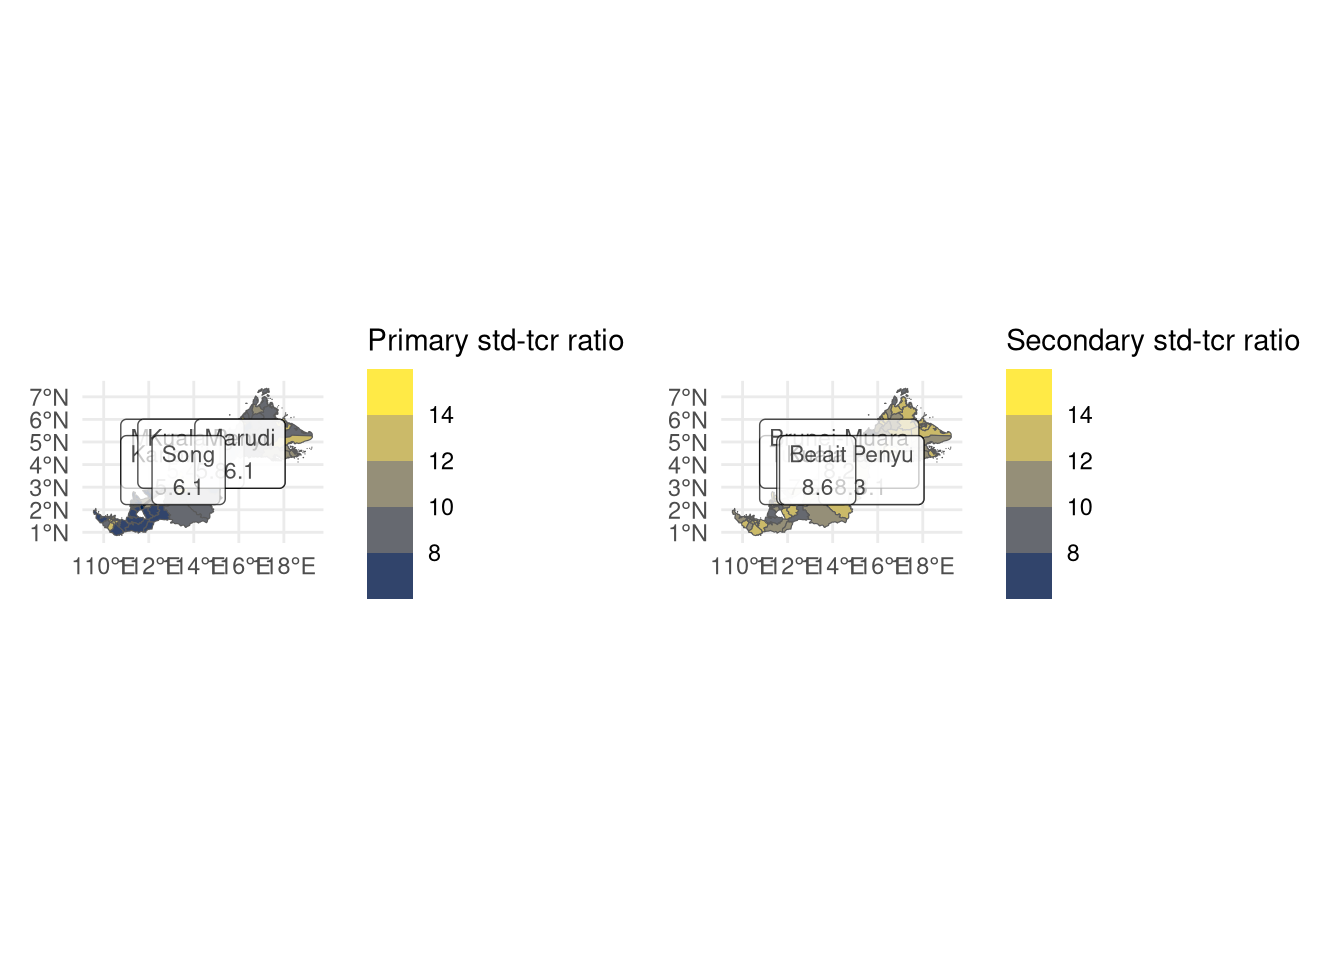

In [ ]:
brn_tchr <- bruneimap::tchr %>% 
  mutate(teachers = as.numeric(M) + as.numeric(`F`),
         district = District,
         stage = case_when(
           `Education Level` == "Primary" ~ "primary",
           `Education Level` == "Secondary" ~ "secondary",
           TRUE ~ `Education Level`)) %>% 
  filter(Sector == "MOE",
         stage %in% c("primary", "secondary")) %>% 
  select(district, stage, teachers)

brn_enrolment <- bruneimap::enrolment %>% 
  mutate(students = as.numeric(M) + as.numeric(`F`),
         district = District,
         stage = case_when(
           `Education Level` == "Primary" ~ "primary",
           `Education Level` == "Secondary" ~ "secondary",
           TRUE ~ `Education Level`)) %>% 
  filter(Sector == "MOE",
         stage %in% c("primary", "secondary")) %>% 
  select(district, stage, students)

mys_tchr <- read_csv("source/mys_teacher.csv")

-   studnet teacher ratio, primary simiilar other than dense city (miri, kuching, kota kinabalu), but brunei has lesser secondary std-tcr\]

### Model

In [ ]:
# Model y ~ pop + hp (socioeconomic) + u_i +v_i (Only Brunei, by mukim) --------------------------

# hp
hp <- read_csv("source/brn_house_price.csv")

Rows: 31116 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): quarter, kampong, mukim, district, type, tenure, status, agent, s...
dbl   (7): id, price, plot_area, floor_area, storeys, beds, baths
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

 [1] "Mukim Melilas"            "Mukim Sukang"            
 [3] "Mukim Kuala Balai"        "Mukim Bukit Sawat"       
 [5] "Mukim Bokok"              "Mukim Labu"              
 [7] "Mukim Burong Pingai Ayer" "Mukim Saba"              
 [9] "Mukim Peramu"             "Mukim Tamoi"             
[11] "Mukim Ukong"              "Mukim Sungai Kedayan"    

Warning in poly2nb(brn_mkm_sch_sf): neighbour object has 2 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument.

 [1] 12.31058 12.31397 12.55410 12.79899 12.34925 13.09716 12.14464 12.57048
 [9] 12.34605 12.32399 12.46060 12.53159 12.25047 12.57266 12.29277 12.84756
[17] 12.62733 12.65971 12.65096 12.61556 12.54256 11.83581 12.61149 12.54250
[25] 12.76547 12.61146 12.57078 12.54259 11.98371 12.37427 12.42108 12.33722
[33] 12.42918 12.34599 13.09102 12.63982 12.66031 12.56034 12.87345

Mean            241046 
Stdev           99486.1 
Quantile  0.025 93412.9 
Quantile  0.25  171617 
Quantile  0.5   225596 
Quantile  0.75  291753 
Quantile  0.975 480927 
Mean            234193 
Stdev           75752.9 
Quantile  0.025 118806 
Quantile  0.25  180306 
Quantile  0.5   222923 
Quantile  0.75  275223 
Quantile  0.975 414546 
Mean            296459 
Stdev           91653.5 
Quantile  0.025 155533 
Quantile  0.25  231686 
Quantile  0.5   283151 
Quantile  0.75  345962 
Quantile  0.975 514318 
Mean            361870 
Stdev           3706.27 
Quantile  0.025 353680 
Quantile  0.25  360099 
Quantile  0.5   361881 
Quantile  0.75  363646 
Quantile  0.975 369888 
Mean            240750 
Stdev           72012.3 
Quantile  0.025 130908 
Quantile  0.25  189798 
Quantile  0.5   229949 
Quantile  0.75  279430 
Quantile  0.975 412675 
Mean            487578 
Stdev           5009.03 
Quantile  0.025 476012 
Quantile  0.25  485276 
Quantile  0.5   487729 
Quantile  0.75  490070 
Quantile 

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

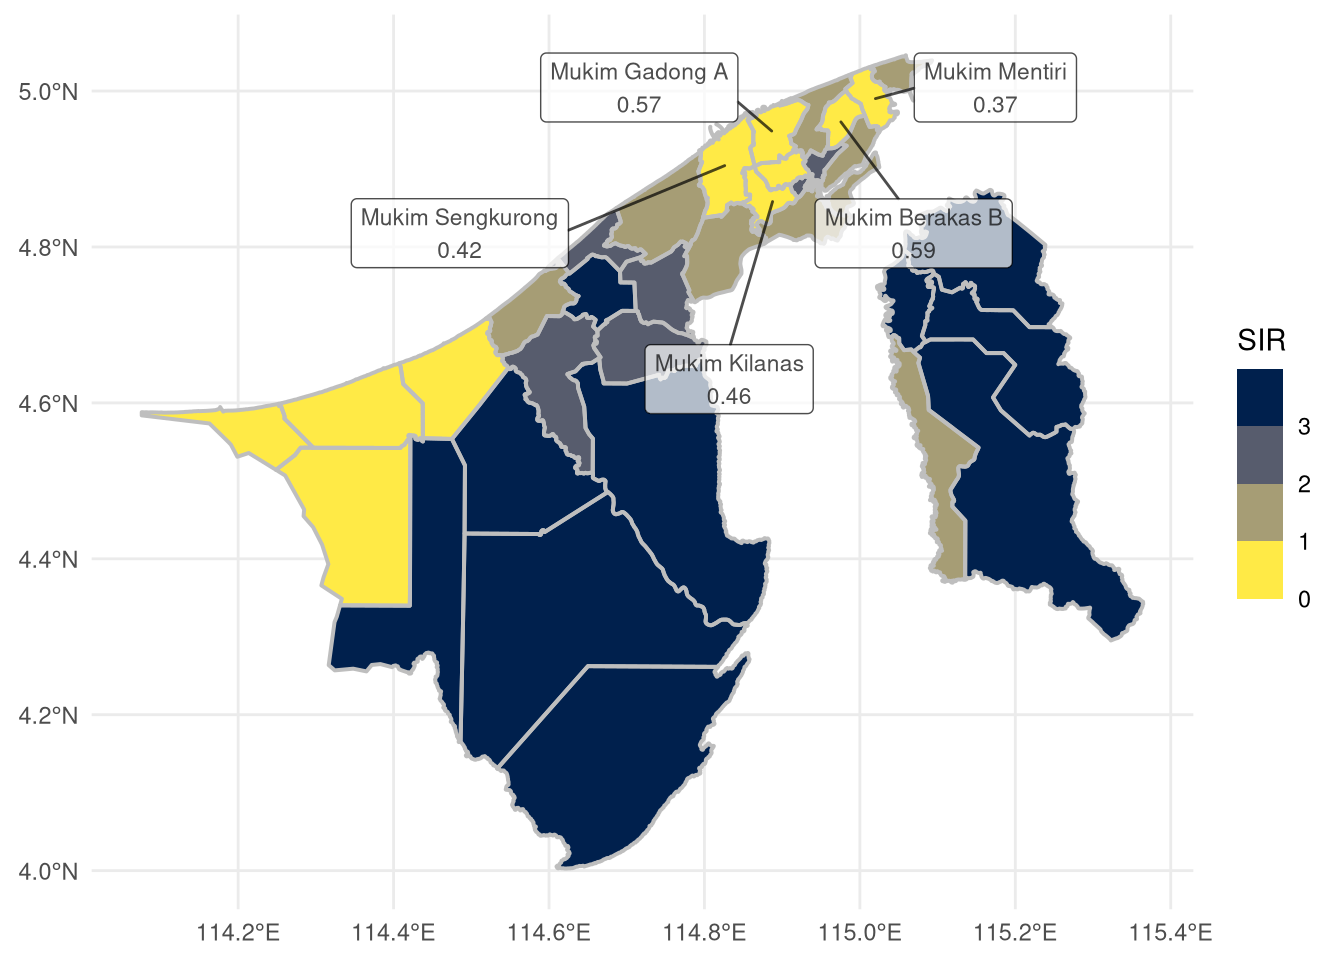

In [ ]:
brn_mkm_sch_sf$area <- as.numeric(st_area(brn_mkm_sch_sf))
brn_mkm_sch_sf$Y <- brn_mkm_sch_sf$schools
brn_mkm_sch_sf$E <- sum(brn_mkm_sch_sf$schools)/sum(brn_mkm_sch_sf$population) * brn_mkm_sch_sf$population
brn_mkm_sch_sf$SIR <- brn_mkm_sch_sf$Y/brn_mkm_sch_sf$E
label_sf <- brn_mkm_sch_sf |> 
  filter(SIR!=0) |> 
  arrange(SIR) |> 
  slice_head(n = 5) |> 
  mutate(label = paste0(mukim, "\n", round(SIR,2)))
ggplot() +
  geom_sf(data = brn_mkm_sch_sf, aes(fill = SIR)) +
  geom_sf(data = filter(mkm_sf), color="grey", alpha=0, linewidth=0.7) +
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    force=5,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    direction = -1,
    name = "SIR",
    na.value = NA,
    breaks = c(0,1,2,3)    # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

-   There are significantly fewer schools in Mukim xxx

In [ ]:
nb <- poly2nb(brn_mkm_sch_sf)

Warning in poly2nb(brn_mkm_sch_sf): neighbour object has 2 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument.

Time used:
    Pre = 2.94, Running = 0.858, Post = 0.039, Total = 3.84 
Fixed effects:
              mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept)  1.077 0.421      0.240    1.080      1.894  1.080   0
pop_s       -0.044 0.007     -0.058   -0.044     -0.029 -0.044   0
area_s       0.002 0.001      0.000    0.002      0.003  0.002   0
hp_s        -0.001 0.001     -0.003   -0.001      0.002 -0.001   0

Random effects:
  Name    Model
    re_u BYM2 model

Model hyperparameters:
                       mean       sd 0.025quant 0.5quant 0.975quant   mode
Precision for re_u 1153.580 8106.813      9.355  150.008   7797.751 19.643
Phi for re_u          0.359    0.279      0.013    0.292      0.929  0.021

Marginal log-Likelihood:  -79.58 
 is computed 
Posterior summaries for the linear predictor and the fitted values are computed
(Posterior marginals needs also 'control.compute=list(return.marginals.predictor=TRUE)')

                     mean           sd    0.025quant      0.5quant   0.975quant
(Intercept)  1.0771263538 0.4210748878  0.2396300253  1.0804845526  1.894407505
pop_s       -0.0436376970 0.0072401090 -0.0578994567 -0.0436207230 -0.029476686
area_s       0.0015500338 0.0008828963 -0.0001639264  0.0015434960  0.003302810
hp_s        -0.0007231179 0.0012448593 -0.0031404031 -0.0007325078  0.001750529
                     mode          kld
(Intercept)  1.0800861168 1.976516e-08
pop_s       -0.0436221941 5.069735e-09
area_s       0.0015440080 1.771365e-08
hp_s        -0.0007314832 1.956673e-08

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

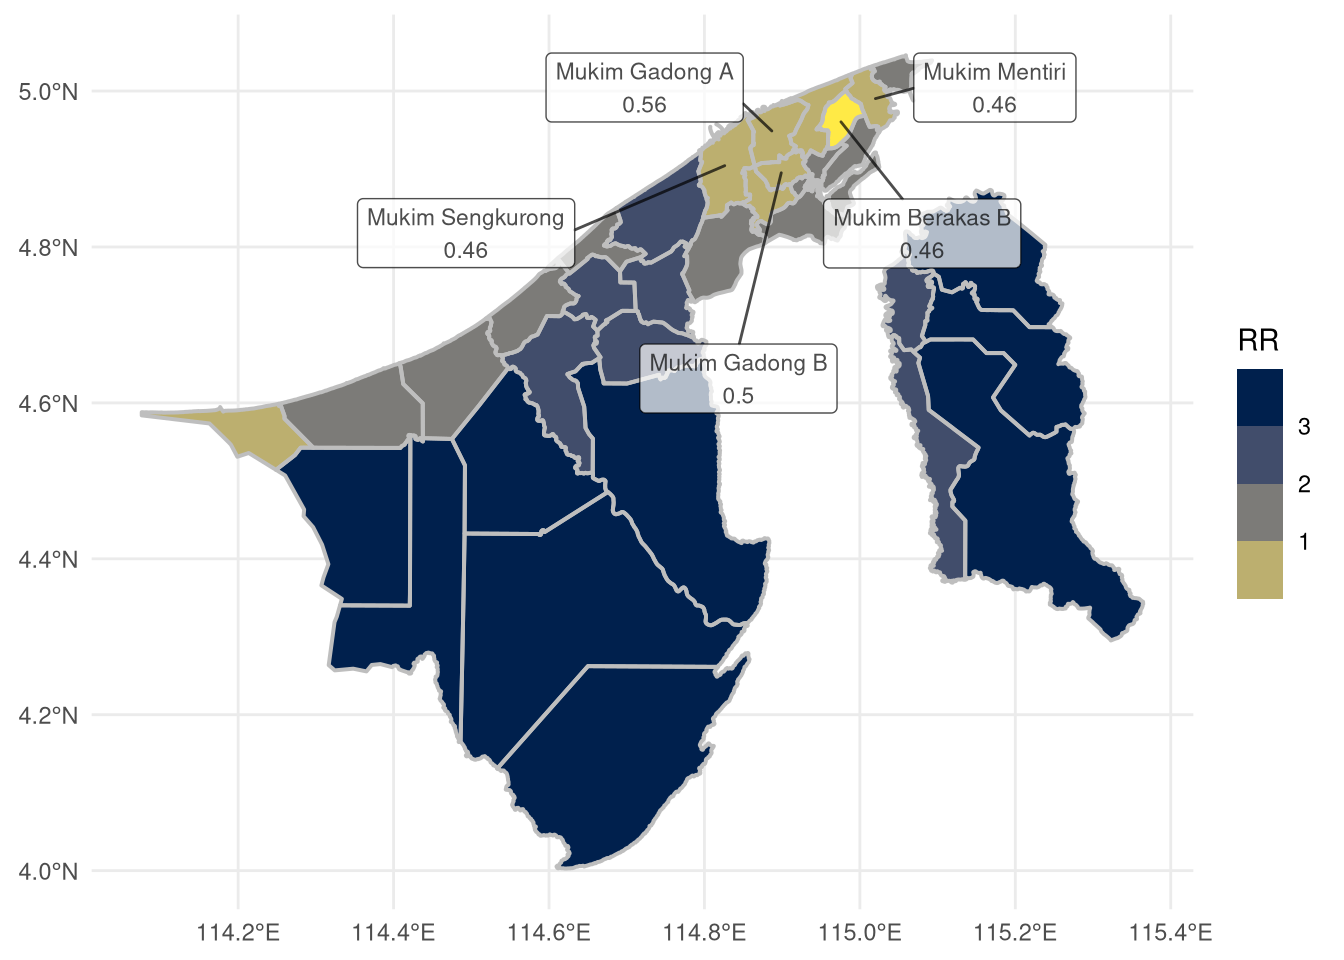

In [ ]:
label_sf <- brn_mkm_sch_sf |> 
  filter(RA!=0) |> 
  arrange(RA) |> 
  slice_head(n = 5) |> 
  mutate(label = paste0(mukim, "\n", round(RA,2)))
ggplot() +
  geom_sf(data = brn_mkm_sch_sf, aes(fill = RA)) +
  geom_sf(data = mkm_sf, color="grey", alpha=0, linewidth=0.7) +
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    force=5,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    direction = -1,
    name = "RR",
    na.value = NA,
    breaks = c(0,1,2,3)    # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

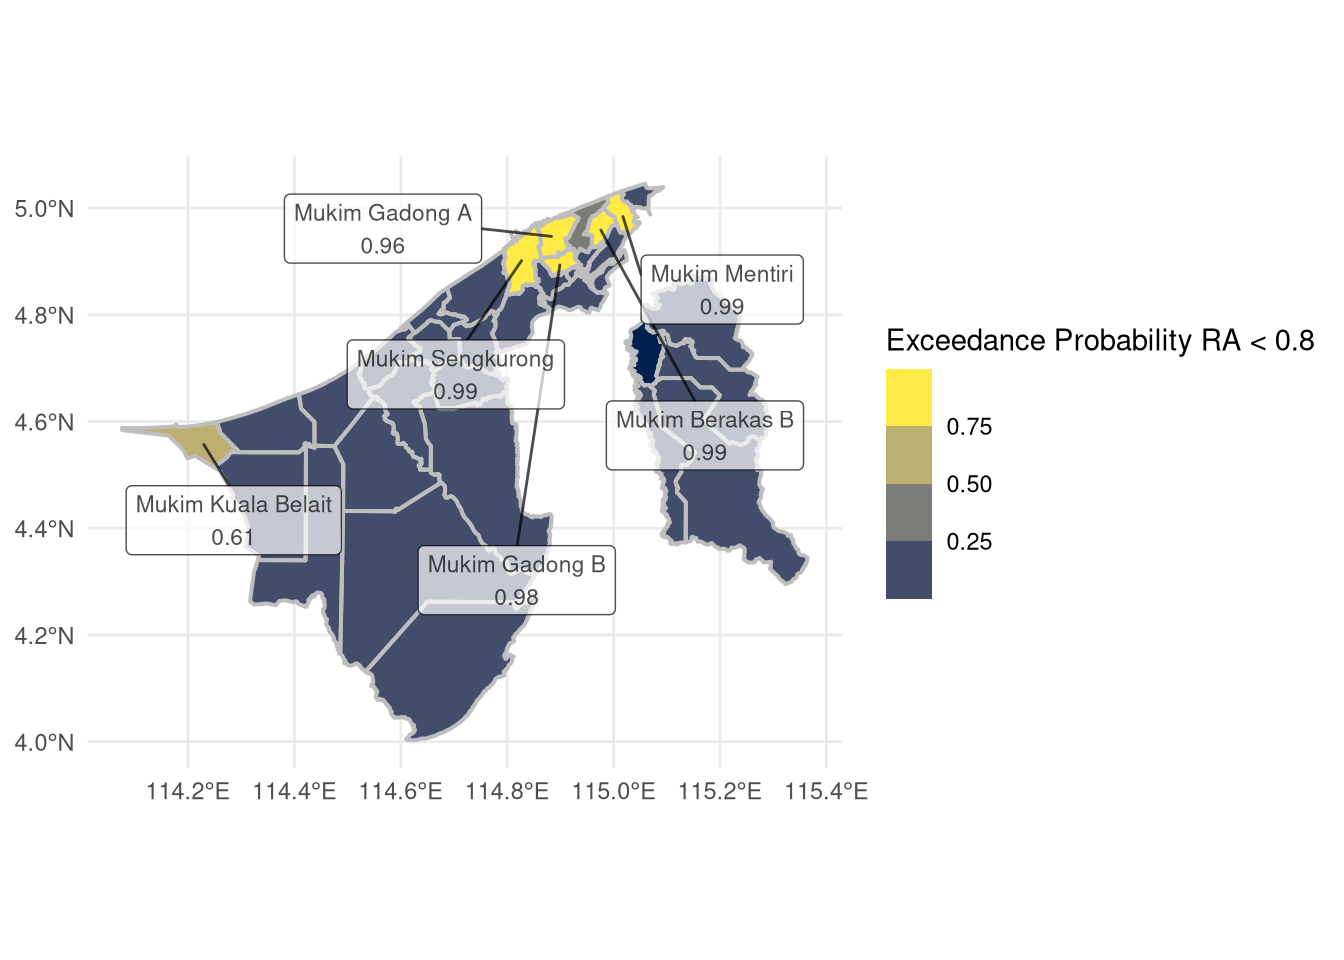

In [ ]:
brn_mkm_sch_sf$exc <- sapply(res$marginals.fitted.values,
                    FUN = function(marg){inla.pmarginal(q = 0.75, marginal = marg)})

label_sf <- brn_mkm_sch_sf |> 
  arrange(desc(exc)) |> 
  slice_head(n = 6) |> 
  mutate(label = paste0(mukim, "\n", round(exc,2)))
ggplot() +
  geom_sf(data = brn_mkm_sch_sf, aes(fill = exc)) +
  geom_sf(data = mkm_sf, color="grey", alpha=0, linewidth=0.7) +
  ggrepel::geom_label_repel(
    data = label_sf,
    aes(label = label, geometry = geometry),
    stat = "sf_coordinates",
    inherit.aes = FALSE,
    box.padding = 1,
    size = 3,
    alpha = 0.7,
    force=5,
    max.overlaps = Inf
  ) +
  scale_fill_viridis_b(
    option = "E",
    direction = 1,
    name = "Exceedance Probability RA < 0.8",
    na.value = NA,
    breaks = c(0,0.25,0.5,0.75)    # Number of bins
  ) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

-   Coefficient , sginificance

## Discussion & Limitation

There are significantly fewer schools in Mukim xxx, when explored, its not forested area. Housing region, some may be newer nieghbourhood so.. good idea for mroe schools there, nearer from home, less transportation cost, environmental, time.

Given that Brunei has higher PISA scores than Malaysia, it would be interesting to explore whether accessibility may be a potential factor. / Malaysia has more population than Brunei, how does the school compare

Limitation: only public schools, to consider private schools age groups, 2018 data, school types, some simulation in housing price, house price is listing price (only a proxy for market values), may deviate from actual sales price due to negotian dynamics and other factors \## Conclusions {#sec-conc}

-   School count quite similar, more in main city
-   studnet teacher ratio, primary simiilar other than dense city (miri, kuching, kota kinabalu), but brunei has lesser secondary std-tcr
-   There are significantly fewer schools in Mukim xxx

## References